In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement_Table = Base.classes.measurement
Stations_Table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement_Table.date).order_by(Measurement_Table.date.desc()).first()
most_recent_date

('2017-08-23',)

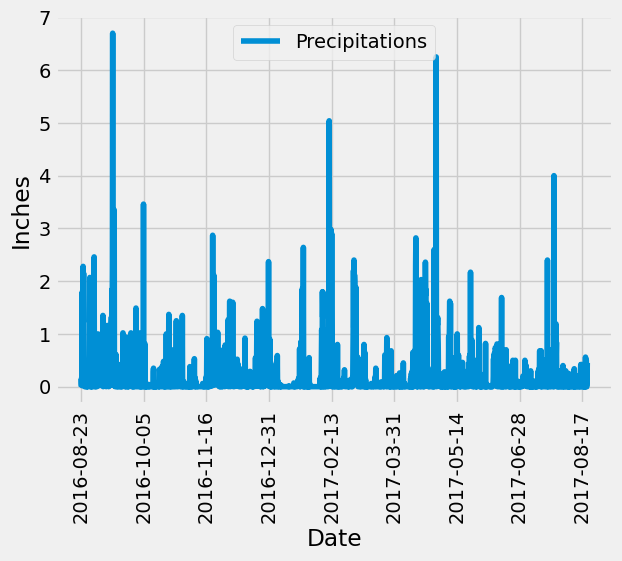

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date.fromisoformat(most_recent_date[0]) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(Measurement_Table.date, Measurement_Table.prcp).filter(Measurement_Table.prcp != None).\
    filter(Measurement_Table.date >= one_year_ago).order_by(Measurement_Table.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_list = [{"Date": result[0], "Precipitations": result[1]} for result in precipitation_results]


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df = pd.DataFrame(precipitation_list).set_index("Date")
ax = precipitation_df.plot(rot = 90)
ax.set_ylabel("Inches");


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitations
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_number_of_stations = session.query(Measurement_Table.station).distinct().count()
total_number_of_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement_Table.station, func.count(Measurement_Table.station)).\
    group_by(Measurement_Table.station).order_by(func.count(Measurement_Table.station).desc()).all()

most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
base_stats = session.query(func.min(Measurement_Table.tobs), func.max(Measurement_Table.tobs),\
                                    func.avg(Measurement_Table.tobs)).\
                                    filter(Measurement_Table.station == most_active_station).all()
print(f"lowest_temp: {base_stats[0][0]}, highest_temp: {base_stats[0][1]}, average_temp: {base_stats[0][2]}")

lowest_temp: 54.0, highest_temp: 85.0, average_temp: 71.66378066378067


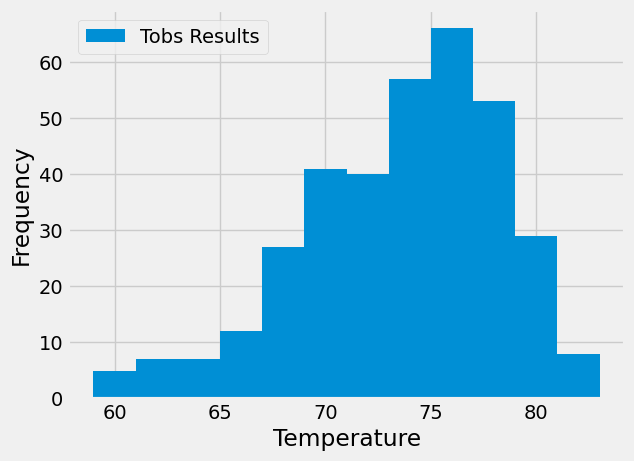

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_temp_results = session.query(Measurement_Table.tobs).filter(Measurement_Table.tobs != None).\
                            filter(Measurement_Table.station == most_active_station).\
                            filter(Measurement_Table.date >= one_year_ago).all()

#create df for histogram temp results
tobs_list = [{"Tobs Results": result[0]} for result in histogram_temp_results] 
tobs_df = pd.DataFrame(tobs_list)
#create histogram
ax = tobs_df.plot.hist(bins=12)
ax.set_xlabel("Temperature");
ax.set_ylabel("Frequency");

# Close Session

In [34]:
# Close Session
session.close()